## Linear Model Prediction

import the libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

# The Demand Data

import the data

In [23]:
df_demand_temp = pd.read_excel('../CEE 5930 Assignment 3 Data -- Fall 2019.xlsx', sheet_name='Demand Data')

In [24]:
df_demand_temp.head()

,Daily High Temp (F),Peak Demand (MwH)
0,92,62.7
1,96,71.5
2,96,73.0
3,89,60.2
4,95,71.2


In [25]:
X = df_demand_temp['Daily High Temp (F)']
Y = df_demand_temp['Peak Demand (MwH)']
X = sm.add_constant(X)
model1 = sm.OLS(Y,X)
results1 = model1.fit()

In [86]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:      Peak Demand (MwH)   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     66.29
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.27e-08
Time:                        18:18:23   Log-Likelihood:                -74.219
No. Observations:                  28   AIC:                             152.4
Df Residuals:                      26   BIC:                             155.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -74.9047    

In [27]:
print("The degree of freedom of the residuals: {}".format(results1.df_resid))
print("The degree of freedom of the regression: {}".format(results1.df_model))
print("The sum of squares (SS) of regression: {}".format(results1.ess))
print("The Regression SS / Regression degrees of freedom: {}".format(results1.mse_model))
print("The mean squared error (Residual SS / Residual degrees of freedom): {}".format(results1.mse_resid))
print("The sum of squares (SS) of residuals: {}".format(results1.ssr))
print("The sum of squares (SS) of total: {}".format(results1.centered_tss))
print("The multiple R: {}".format(np.sqrt(results1.rsquared)))
print("The standard error: {}".format(np.std(results1.resid)))

The degree of freedom of the residuals: 26.0
The degree of freedom of the regression: 1.0
The sum of squares (SS) of regression: 838.490363263679
The Regression SS / Regression degrees of freedom: 838.490363263679
The mean squared error (Residual SS / Residual degrees of freedom): 12.6491069074409
The sum of squares (SS) of residuals: 328.8767795934634
The sum of squares (SS) of total: 1167.3671428571424
The multiple R: 0.847510924779519
The standard error: 3.427185327815687


## calculate a 95% confidence interval for a prediction of peak power demand on a day when the forecast high temperature is 88 F

In [35]:
slope = 1.5295
intercept = -74.9047
y_hat = intercept + slope*df_demand_temp['Daily High Temp (F)']
y_hat_x_equal_88 = intercept + slope*88
t_value = 2.056
n = 28
k = 1
x_mean = np.mean(df_demand_temp['Daily High Temp (F)'])
Se = np.sqrt(np.sum(np.square(df_demand_temp['Peak Demand (MwH)']-y_hat))/(n-k-1))
Sxx = np.sum(np.square(df_demand_temp['Daily High Temp (F)']-x_mean))

In [36]:
interval_with_95_confidence_when_x_equals_88 = [y_hat_x_equal_88 - t_value*Se*np.sqrt(1+1/n+(np.square(88-x_mean)/Sxx)),
                                                y_hat_x_equal_88 + t_value*Se*np.sqrt(1+1/n+(np.square(88-x_mean)/Sxx))]

In [37]:
print("The 95% confidence interval for a prediction of peak power demand on a day when the forecast high temperature is 88 F is: {}".format(interval_with_95_confidence_when_x_equals_88))

The 95% confidence interval for a prediction of peak power demand on a day when the forecast high temperature is 88 F is: [51.93699738211079, 67.44560261788921]


## Compute the PRESS statistic and the coefficient of prediction (P2) for this regression

In [39]:
hii = 1/n + np.square(df_demand_temp['Daily High Temp (F)']-x_mean)/np.sum(np.square(df_demand_temp['Daily High Temp (F)']-x_mean))
TSS = results1.centered_tss

In [40]:
PRESS = 382.0537

In [41]:
P_squared = 1- (PRESS/TSS)*np.square((n-1)/n)

In [42]:
P_squared

0.6956814609983147

# The Maint Cost Data

## import the data

In [43]:
df_maint_cost = pd.read_excel('../CEE 5930 Assignment 3 Data -- Fall 2019.xlsx', sheet_name='Maint Cost Data')

In [44]:
df_maint_cost

,Customers (000's),Line Maintenance ($000)
0,25.3,484.6
1,36.4,672.3
2,37.9,839.4
3,45.9,694.9
4,53.4,836.4
5,66.8,681.9
6,78.4,1037.0
7,82.6,1095.6
8,93.8,1563.1
9,97.5,1377.9


In [45]:
X = df_maint_cost["Customers (000's)"]
Y = df_maint_cost['Line Maintenance ($000)']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()
results2.params

const                33.320575
Customers (000's)    15.015982
dtype: float64

## Build a simple linear model

In [46]:
y_hat = df_maint_cost["Customers (000's)"]*results2.params[1] + results2.params.const
residual = df_maint_cost["Line Maintenance ($000)"]-y_hat

In [47]:
residual

0      71.375070
1      92.397665
2     236.973691
3     -27.654168
4       1.225963
5    -354.488201
6    -173.573597
7    -178.040724
8     121.280273
9    -119.478862
10     91.190082
11    238.792809
dtype: float64

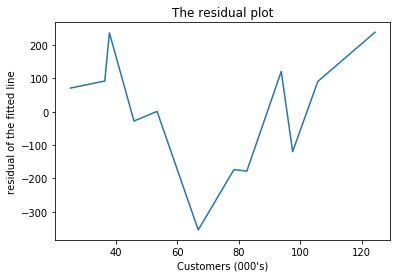

In [48]:
fig, axes = plt.subplots(1,1)
ax = sns.lineplot(x=df_maint_cost["Customers (000's)"], y=residual)
plt.title("The residual plot")
plt.xlabel("Customers (000's)")
plt.ylabel("residual of the fitted line")
plt.show()

## adding a quadratic term to the linear model

In [49]:
X_squared = np.square(df_maint_cost["Customers (000's)"])

In [51]:
df_maint_cost['Customers Squared'] = X_squared
X = df_maint_cost[["Customers (000's)", "Customers Squared"]]
Y = df_maint_cost['Line Maintenance ($000)']
X = sm.add_constant(X)
model3 = sm.OLS(Y,X)
results3 = model3.fit()
print(results3.params)
print(results3.summary())

const                707.474738
Customers (000's)     -7.392210
Customers Squared      0.154305
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Line Maintenance ($000)   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.61
Date:                     Thu, 17 Oct 2019   Prob (F-statistic):           2.80e-06
Time:                             17:15:30   Log-Likelihood:                -74.112
No. Observations:                       12   AIC:                             154.2
Df Residuals:                            9   BIC:                             155.7
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          

/Users/shufang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [52]:
print("The correlation between the two variables is {}".format(np.corrcoef(df_maint_cost["Customers (000's)"], df_maint_cost['Customers Squared'])[1,0]))

The correlation between the two variables is 0.9829391102473414


## Calculate the VIF of the new quadratic variable

In [67]:
X = df_maint_cost["Customers (000's)"]
Y = df_maint_cost['Customers Squared']
X = sm.add_constant(X)
model4 = sm.OLS(Y,X)
results4 = model4.fit()

In [68]:
R_squared_of_quadratic = results4.rsquared

In [69]:
VIF = 1/(1-R_squared_of_quadratic)

In [70]:
print(VIF)

29.55894604785621


## transform the data using the “centered predictor” method 

In [153]:
X = df_maint_cost[["Customers (000's)", "Customers Squared"]]
Customers_transformed = X["Customers (000's)"]-np.mean(X["Customers (000's)"])
X["Customers (000's)"] = Customers_transformed
Customer_quadratic_transformed = np.square(Customers_transformed)
X["Customers Squared"] = Customer_quadratic_transformed
X.columns = ["Customers (000's) transformed", "Customers Squared transformed"]
X_transformed = X
# print(X)
Y = df_maint_cost['Line Maintenance ($000)']
X = sm.add_constant(X)
model5 = sm.OLS(Y,X)
results5 = model5.fit()
print(results5.params)
print(results5.summary())

    Customers (000's) transformed  Customers Squared transformed
0                      -45.366667                    2058.134444
1                      -34.266667                    1174.204444
2                      -32.766667                    1073.654444
3                      -24.766667                     613.387778
4                      -17.266667                     298.137778
5                       -3.866667                      14.951111
6                        7.733333                      59.804444
7                       11.933333                     142.404444
8                       23.133333                     535.151111
9                       26.833333                     720.027778
10                      35.033333                    1227.334444
11                      53.633333                    2876.534444
const                            955.656261
Customers (000's) transformed     14.416215
Customers Squared transformed      0.154305
dtype: float64
        

/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shufang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shufang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, 

In [80]:
print("The correlation between the two transformed variables is {}".format(np.corrcoef(Customers_transformed, Customer_quadratic_transformed)[1,0]))

The correlation between the two transformed variables is 0.14159535842171467


## Calculate the VIF of the new transformed quadratic variable

In [81]:
X = Customers_transformed
Y = Customer_quadratic_transformed
X = sm.add_constant(X)
model6 = sm.OLS(Y,X)
results6 = model6.fit()

In [82]:
R_squared_of__transformed_quadratic = results6.rsquared

In [83]:
VIF_transformed = 1/(1-R_squared_of__transformed_quadratic)

In [84]:
print(VIF_transformed)

1.0204594419005752


## calculate a 95% confidence interval for the predicted line maintenance costs for a utility serving 100,000 customers

In [155]:
MSres = results5.mse_resid
X0 = [100-np.mean(df_maint_cost["Customers (000's)"]), np.square(100-np.mean(df_maint_cost["Customers (000's)"]))]
X = X_transformed[["Customers (000's) transformed", "Customers Squared transformed"]]
slope1 = 14.4162
slope2 = 0.1543 
intercept = 955.6563
n = 12
k = 1
t_value = 2.228
y_hat_x_equal_100 = X0[0]*slope1 + X0[1]*slope2 + intercept

In [156]:
interval_with_95_confidence_when_x_equals_100 = [y_hat_x_equal_100 - t_value*np.sqrt(MSres*(1+int(np.dot(np.dot(np.transpose(X0),(np.matrix((np.dot(np.array(np.transpose(X)),np.array(X)))).I)),X0)))), 
                                                y_hat_x_equal_100 + t_value*np.sqrt(MSres*(1+int(np.dot(np.dot(np.transpose(X0),(np.matrix((np.dot(np.array(np.transpose(X)),np.array(X)))).I)),X0))))]

In [157]:
interval_with_95_confidence_when_x_equals_100

[1211.8387678107656, 1810.7573877447894]

In [158]:
print("The 95% confidence interval for a prediction of maintenance costs for a utility serving 100,000 customers is: {}".format(interval_with_95_confidence_when_x_equals_100))

The 95% confidence interval for a prediction of maintenance costs for a utility serving 100,000 customers is: [1211.8387678107656, 1810.7573877447894]
